### Fruit breeding
Data has 1500 fruit blossoms from 3 fruit types (apricots, peaches, plums) 

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Load the data.
df = pd.read_csv('LSE_DA301_Week_2_files/Data/fruit.csv')

# View the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sepal_length    1500 non-null   float64
 1   sepal_width     1500 non-null   float64
 2   tree_age        1500 non-null   int64  
 3   location        1500 non-null   object 
 4   colour_blossom  1500 non-null   object 
 5   fruit_type      1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [2]:
df.head()

,sepal_length,sepal_width,tree_age,location,colour_blossom,fruit_type
0,5.1,3.5,10,A_52,light_pink,apricot
1,4.9,3.0,10,A-52,light_pink,apricot
2,4.7,3.2,10,A-52,light_pink,apricot
3,4.6,3.1,10,A-52,light_pink,apricot
4,5.0,3.6,10,A-52,light_pink,apricot


In [3]:
# Drop unnecessary columns
df_fruit = df.drop(columns=['tree_age', 'location', 'colour_blossom'])

# Display a summary of the numeric variables.
df_fruit.describe()

,sepal_length,sepal_width
count,1500.000000,1500.000000
mean,6.030071,3.171469
std,0.975327,0.536772
min,3.941667,1.826087
25%,5.280000,2.800000
50%,5.980000,3.100000
75%,6.674000,3.480000
max,9.480000,5.300000


### visualise the data 

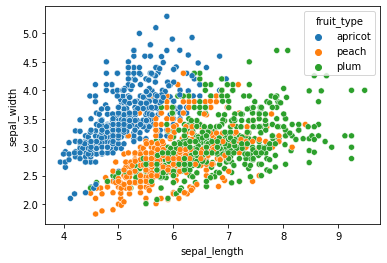

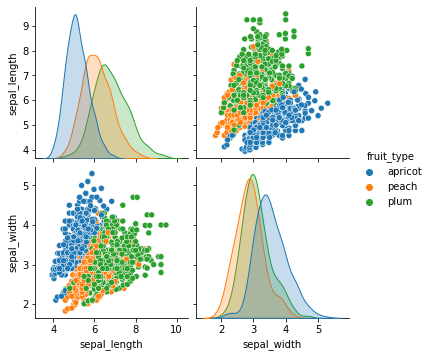

In [4]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='sepal_length', y='sepal_width',
                data=df_fruit, hue='fruit_type')


# Create a pairplot with Seaborn.
x = df_fruit[['sepal_length', 'sepal_width']]

sns.pairplot(df_fruit, vars=x,
             hue='fruit_type', diag_kind= 'kde')

We see that the three groups are quite visible. We now want to improve the accuracy or visibilty of the three clusters. 

### Improve accuracy with k-means (and test with elbow and silhouette)

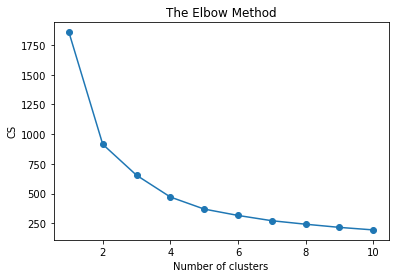

In [5]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

The above creates the kmeans model for each cluster count (1 to 11). The 'inertia' value i.e. the error based on 'within-cluster sum-of-squares' is recorded in 'cs'. We can then plot the cs values against the number of clusters

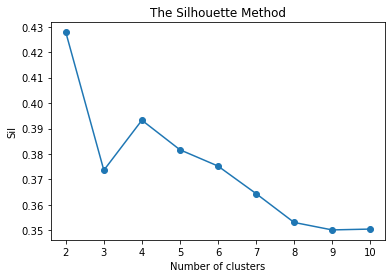

In [7]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

The above silhouette plot suggests that the optimal number of clusters will be 4. 

Note: The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.


### Selecting the number of clusters 

#### try 4 clusters

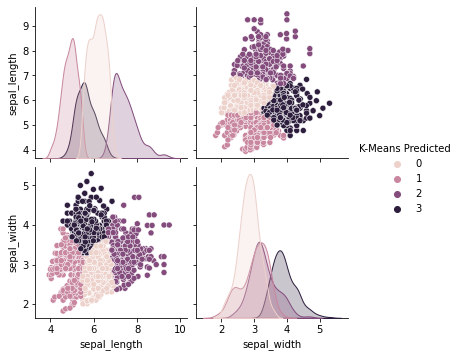

In [9]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [10]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    535
1    361
2    326
3    278
Name: K-Means Predicted, dtype: int64

In [11]:
# View the K-Means predicted.
print(x.head())

   sepal_length  sepal_width  K-Means Predicted
0           5.1          3.5                  1
1           4.9          3.0                  1
2           4.7          3.2                  1
3           4.6          3.1                  1
4           5.0          3.6                  1


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

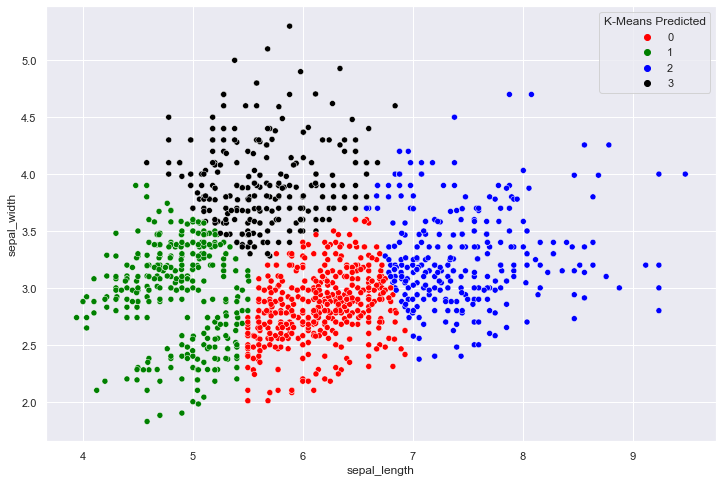

In [12]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='sepal_length' , 
                y ='sepal_width',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

#### try 3 clusters

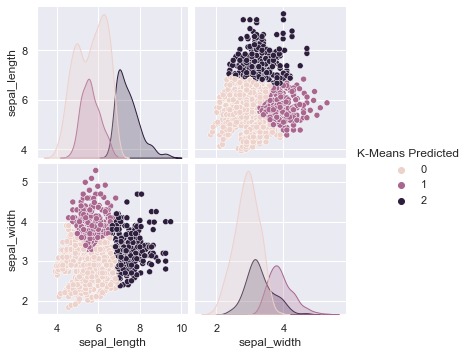

In [13]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [14]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    896
2    326
1    278
Name: K-Means Predicted, dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

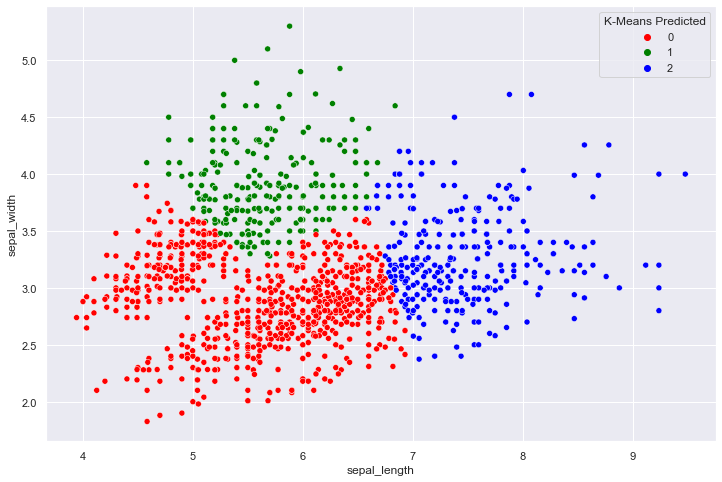

In [15]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='sepal_length' , 
                y ='sepal_width',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue'])